# Structural Causal Models

Structural causal models (SCMs) are a powerful extension of directed acyclic graphs (DAGs), providing a more detailed and quantitative framework for understanding causal relationships. While DAGs visually represent causal dependencies, SCMs use mathematical equations to specify how variables influence each other, capturing both direct and indirect effects. This allows us to precisely descibe data-generating processes and underlying relationships among variables. 


## Components of SCMs
SCMs are defined by a set of **structural equations**, where each endogenous variable is expressed as a function of its direct causes (parents) and an error term. These equations quantify the causal relationships depicted in a DAG. Within SCMs and DAGs, we can distinguish between endogenous and exogenous variables:
- **Endogenous variables** are variables whose values are determined within the model. These are the nodes in the DAG.
- **Exogenous Variables** are variables that affect the endogenous variables but are not influenced by them. These are typically represented as error terms in the structural equations.

The **error terms** capture the influence of unobserved factors on each endogenous variable. They represent all other influences not explicitly included in the model.


## From DAG to SCM
DAGs and SCMs are closely related:
- **From DAG to SCM:** each directed edge in a DAG corresponds to a term in a structural equation. The absence of an edge implies no direct causal effect.
- **From SCM to DAG:** structural equations can be translated into a DAG by drawing an edge from each parent variable to its child variable as specified by the equations.

### Example
Let's now see in practice how we can translate a DAG into a SCM, that will give us the structural equations we can use to generate data following the causal structure represented by the DAG.

#### Step 1: Drawing a Simple DAG

Let's start by creating a simple DAG represenitng the effect of weather fluctuations on wind forecast errors and balancing costs. In electricity markets, balancing costs are the expenses incurred to maintain the balance between electricity supply and demand. Balancing is crucial for the stability of the electricity grid. Balancing costs arise when there is a need to match the electricity supply with the actual demand in real time. If the wind forecast is inaccurate, the grid operator may need to use more expensive and less efficient sources of electricity to make up for the shortfall or to reduce excess supply. This incurs additional costs.

We expect the following relationship between these three variables:
- **Weather conditions** are exogenous variables, which are driven by external factors such as climate patterns, geographical location, and seasonal changes.
- **Weather fluctuations directly influence wind forecast errors**. For example, unexpected weather changes can lead to larger errors in predicting wind energy production.
- **Wind forecast errors directly influence balancing costs**. Larger forecast errors typically result in higher balancing costs due to the need for additional adjustments in electricity supply.


These relationships translate into the following DAG.

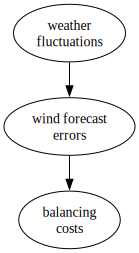

In [1]:
import graphviz
from IPython.display import display

# Create a new graph
dot = graphviz.Digraph()

# Add nodes
dot.node('W', 'weather \nfluctuations')
dot.node('F', 'wind forecast \nerrors')
dot.node('B', 'balancing \ncosts')

# Add edges
dot.edge('W', 'F')
dot.edge('F', 'B')

# Display the graph in the notebook
display(dot)

#### Step 2: Adding the Weights

The next step to derive the SCM from the DAG is to know the coefficients represint the weights of the edges in the DAG. We will now assume these weights are known.

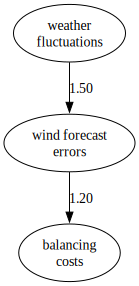

In [2]:
import numpy as np
from lingam.utils import make_dot

# Matrix of coefficients (weights)
m = np.array([[0.0, 0.0, 0.0],
              [1.5, 0.0, 0.0],
              [0.0, 1.2, 0.0]])

# Plotting causal graph
make_dot(m, labels=["weather \nfluctuations", "wind forecast \nerrors", "balancing \ncosts"])

The matrix `m` used in the plot is sometimes referred to as the **adjacency matrix**, and it contains the weights of the edges in a DAG. It is a $p \times p$ matrix where $p$ is the number of variables (nodes) in the DAG. In this context, $p = 3$, representing the variables: weather fluctuations, wind forecast errors, and balancing costs.

The element at position $(i, j)$ represents the weight of the edge from node $i$ to node $j$:
- A value of 0 indicates **no direct causal connection**.
- A non-zero value indicates a **direct causal connection**, with the value representing the strength or magnitude of the causal effect.

In our example:
- The element $m_{21} = 1.5$ means that weather fluctuations (node 1) have a causal effect on wind forecast errors (node 2) with a weight of 1.5.
- The element $m_{32} = 1.2$ means that wind forecast errors (node 2) have a causal effect on balancing costs (node 3) with a weight of 1.2.
- All other elements being 0 indicate no direct causal connections between those nodes.

#### Step 3: Writing the SCM

Knowing the weights, we can write the following Structural Causal Model (SCM):

\begin{align}
    \text{weather fluctuations} &= e_w \\
    \text{wind forecast errors} &= 1.5 \times \text{weather fluctuations} + e_f \\
    \text{balancing costs} &= 1.2 \times \text{wind forecast errors} + e_b
\end{align}

Here, we can see the concepts we introduced before:
- **Weather fluctuations** are exogenous variables represented by $e_w$, driven by external factors and not influenced by other variables within the model.
- **Wind forecast errors** are influenced by weather fluctuations and have an additional noise term $e_f$, capturing the variability not explained by weather alone.
- **Balancing costs** are influenced by wind forecast errors and have an additional noise term $e_b$, capturing the variability not explained by forecast errors alone.

These equations (the **structural equations**) reflect the causal relationships and the strengths of these effects as specified by the weights in the adjacency matrix.

#### Doing the Opposite: from SCM to DAG

If we are only given the SCM, using these concepts, we can also draw the DAG from the SCM to visually represent the causal structure and the dependencies among the variables. The main concepts to remember are:
- We can identify the nodes as the variables in the model and the edges as the non-zero coefficients in the structural equations.
- Each non-zero coefficient indicates a direct causal influence of one variable on another, and the magnitude of the coefficient represents the strength of this influence.

By mapping these relationships, we can construct the DAG, which provides a clear and intuitive visualization of the causal pathways and interactions within the system.